In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft

In [151]:
import os

In [152]:
import pylab_util as PU

In [153]:
import serial

In [154]:
import serial_utils

In [155]:
import importlib

In [156]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/ryanwkrauss/git/research/serial_utils.py'>

In [157]:
import re

In [158]:
p = re.compile("^[0-9.]+,.*")

In [159]:
def data_to_float_array(data):
    mylist = data.split('\n')

    for i, rowstr in enumerate(mylist):
        if p.search(rowstr) is not None:
            #this is the start row
            start_ind = i
            break
                
    # search backwards for '#end'
    N = len(mylist)
    for i in range(1,N):
        ind = N-i
        rowstr = mylist[ind]
        if p.search(rowstr) is not None:
            end_ind = ind
            break
    
    clean_list = mylist[start_ind:end_ind]
    clean_2 = list(filter(None,clean_list))
    nested_list = [row.split(',') for row in clean_2]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array

In [160]:
pwd

'/home/ryanwkrauss/sabbatical_github_work/arduino_oop_block_diagram'

In [161]:
ls /dev/tty*

/dev/tty  /dev/ttyACM0


## Get the portname

In [162]:
for i in range(10):
    portname = "/dev/ttyACM%i" % i
    if os.path.exists(portname):
        break
print("portname: %s" % portname)

portname: /dev/ttyACM0


In [163]:
ser = serial_utils.serial_test(portname)

In [164]:
ser.open()

In [166]:
ser.print_all()

Arduino codegen test 3 - MPU6050 accel z
using rtblockdiagram library

Initializing I2C devices...
Testing device connections...
MPU6050 connection successful
accel range: 2
kp = 3.00
kd = 0.10
enter any character to start a test



In [167]:
ser.flush()

In [168]:
ser.write_char('s')

In [169]:
data = ser.get_data()

In [170]:
data2 = ser.get_data()

In [171]:
data += data2

In [172]:
print(data)

t0 =5538288
0.41,0,0,0,0,0,-586
2.52,0,0,0,0,0,-590
4.62,0,0,0,0,0,-609
6.72,0,0,0,0,0,-609
8.83,0,0,0,0,0,-589
10.92,0,0,0,0,0,-643
13.06,0,0,0,0,0,-598
15.20,0,0,0,0,0,-609
17.34,0,0,0,0,0,-567
19.49,0,0,0,0,0,-615
21.62,0,0,0,0,0,-623
23.78,0,0,0,0,0,-611
25.92,0,0,0,0,0,-620
28.06,0,0,0,0,0,-595
30.20,0,0,0,0,0,-605
32.33,0,0,0,0,0,-650
34.48,0,0,0,0,0,-622
36.60,0,0,0,0,0,-627
38.73,0,0,0,0,0,-599
40.87,0,0,0,0,0,-608
43.00,0,0,0,0,0,-629
45.14,0,0,0,0,0,-619
47.28,0,0,0,0,0,-576
49.42,0,0,0,0,0,-585
51.58,0,0,0,0,0,-584
53.73,0,0,0,0,0,-592
55.89,0,0,0,0,0,-594
58.04,0,0,0,0,0,-598
60.18,0,0,0,0,0,-588
62.33,0,0,0,0,0,-599
64.48,0,0,0,0,0,-616
66.62,0,0,0,0,0,-583
68.77,0,0,0,0,0,-571
70.92,0,0,0,0,0,-588
73.06,0,0,0,0,0,-614
75.20,0,0,0,0,0,-587
77.33,0,0,0,0,0,-591
79.48,0,0,0,0,0,-588
81.61,0,0,0,0,0,-586
83.76,0,0,0,0,0,-605
85.89,0,0,0,0,0,-620
88.04,0,0,0,0,0,-576
90.17,0,0,0,0,0,-599
92.31,0,0,0,0,0,-587
94.46,0,0,0,0,0,-588
96.62,0,0,0,0,0,-610
98.78,0,0,0,0,0,-584
100.94

In [173]:
float_array = data_to_float_array(data)

In [174]:
t = float_array[:,0]

In [175]:
if t[0] > 500:
    t[0] = 0

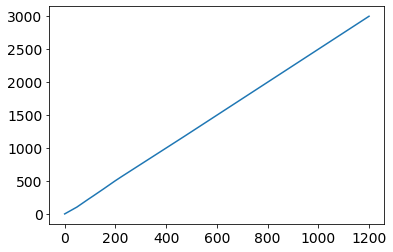

In [176]:
plt.figure()
plt.plot(t)

In [177]:
dt_array = t[1:]-t[0:-1]

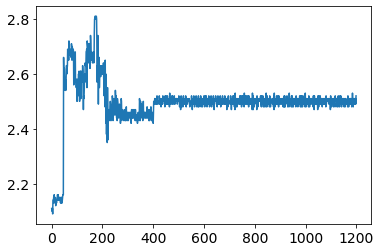

In [178]:
plt.figure()
plt.plot(dt_array)

In [180]:
enc = float_array[:,-2]
az = float_array[:,-1]

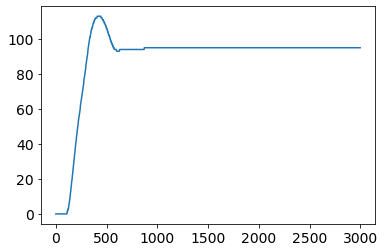

In [182]:
plt.figure()
plt.plot(t, enc)
#plt.ylim([-5,260])
#plt.xlim([0,2000])
#plt.legend(['ax','ay','az'])

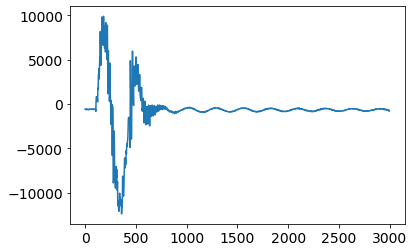

In [181]:
plt.figure()
plt.plot(t, az)
#plt.ylim([-5,260])
#plt.xlim([0,2000])
#plt.legend(['ax','ay','az'])

In [104]:
ser.close()

In [34]:
data_out = float_array

In [359]:
np.savetxt(fn,data_out,delimiter=',')